<a href="https://colab.research.google.com/github/siddpathak5/Aviation-Analysis-Project/blob/main/WT_Aviation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the neccessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. Data Loading and Initial Exploration:**

In [ ]:
#reading the csv file
Aviation_Data1 = pd.read_csv('//content/drive/MyDrive/Colab Notebooks/Data Files/AviationData.csv', encoding='latin1')

<ipython-input-3-40e1453ec9a7>:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  Aviation_Data1 = pd.read_csv('//content/drive/MyDrive/Colab Notebooks/Data Files/AviationData.csv', encoding='latin1')


In [ ]:
#making a copy of aviation data
Aviation_Data = Aviation_Data1.copy()

In [ ]:
#viewing the data
Aviation_Data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
#getting the basic information of the columns
Aviation_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [ ]:
#getting the statistical summary of the columns
Aviation_Data.describe()


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [ ]:
#getting the statistical summary of the object datatype columns
Aviation_Data.describe(include = 'object').T

,count,unique,top,freq
Event.Id,88889,87951,20001212X19172,3
Investigation.Type,88889,2,Accident,85015
Accident.Number,88889,88863,CEN22LA149,2
Event.Date,88889,14782,1984-06-30,25
Location,88837,27758,"ANCHORAGE, AK",434
Country,88663,219,United States,82248
Latitude,34382,25592,332739N,19
Longitude,34373,27156,0112457W,24
Airport.Code,50132,10374,NONE,1488
Airport.Name,52704,24870,Private,240


# **2. Data Cleaning:**

In [ ]:
#Viewing all the columns in the data
Aviation_Data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [ ]:
#Identifying the columns with missing values.
missing_values = Aviation_Data.isna().sum()

In [ ]:
#Cheking total number of null values.
missing_values

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,52
Country,226
Latitude,54507
Longitude,54516
Airport.Code,38757
Airport.Name,36185


In [ ]:
# Calculating the percentage of missing values for each column
missing_percentage = (missing_values / len(Aviation_Data)) * 100

# Combining the two into a DataFrame and filter to show only columns with missing values
missing_data = pd.DataFrame({'Missing Values': missing_values,'Percentage': missing_percentage}).loc[missing_values > 0]

# Displaying the resulting DataFrame with columns that have missing values with percentage.
missing_data

,Missing Values,Percentage
Location,52,0.058500
Country,226,0.254250
Latitude,54507,61.320298
Longitude,54516,61.330423
Airport.Code,38757,43.601570
Airport.Name,36185,40.708074
Injury.Severity,1000,1.124999
Aircraft.damage,3194,3.593246
Aircraft.Category,56602,63.677170
Registration.Number,1382,1.554748


In [ ]:
#Dropping the columns having high percenatge of missing value.
Aviation_Data.drop(columns= ['Latitude', 'Longitude', 'Airport.Code', 'Air.carrier', 'Schedule', 'FAR.Description', 'Aircraft.Category'], inplace = True)

In [ ]:
#Calculating the mode of the columns having numerical datatypes.
modes = Aviation_Data[['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].mode()
modes


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#Defining default fill(mode) values.
fill_values = {'Location': 'ANCHORAGE, AK','Country': 'United States','Injury.Severity': 'Non-Fatal','Aircraft.damage': 'Substantial','Registration.Number': 'NONE','Make': 'Cessna','Model': '152',
               'Amateur.Built': 'No','Number.of.Engines': 1.0,'Engine.Type': 'Reciprocating','Purpose.of.flight': 'Personal','Total.Fatal.Injuries': 0.0,'Total.Serious.Injuries': 0.0, 'Airport.Name': 'No Data',
               'Total.Minor.Injuries': 0.0,'Total.Uninjured': 0.0,'Weather.Condition': 'VMC','Broad.phase.of.flight': 'Landing','Report.Status': 'Probable Cause','Publication.Date': '25-09-2020'}

#Applying fillna using the dictionary
Aviation_Data.fillna(value=fill_values, inplace=True)

In [ ]:
#Reviewing the null values again.
Aviation_Data.isna().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,0
Country,0
Airport.Name,0
Injury.Severity,0
Aircraft.damage,0
Registration.Number,0


In [ ]:
# Converting 'Event.Date' and 'Publication.Date' to datetime datatype
Aviation_Data['Event.Date'] = pd.to_datetime(Aviation_Data['Event.Date'], errors='coerce')
Aviation_Data['Publication.Date'] = pd.to_datetime(Aviation_Data['Publication.Date'], errors='coerce', format='%d-%m-%Y')

In [ ]:
#Reviewing the column datatypes again.
Aviation_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88889 non-null  object        
 5   Country                 88889 non-null  object        
 6   Airport.Name            88889 non-null  object        
 7   Injury.Severity         88889 non-null  object        
 8   Aircraft.damage         88889 non-null  object        
 9   Registration.Number     88889 non-null  object        
 10  Make                    88889 non-null  object        
 11  Model                   88889 non-null  object        
 12  Amateur.Built           88889 non-null  object

# **3. Data Preprocessing:**

In [ ]:
#Identifying the outliers using Interquartile Methods (IQR).
numerical_cols = ['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# Create a dictionary to store outlier masks
outliers = {}

# Loop over each column and calculate the IQR and identify outliers
for i in numerical_cols:
    Q1 = Aviation_Data[i].quantile(0.25)
    Q3 = Aviation_Data[i].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outlier_ = (Aviation_Data[i] < (Q1 - 1.5 * IQR)) | (Aviation_Data[i] > (Q3 + 1.5 * IQR))

    # Store the outlier mask
    outliers[i] = outlier_

# Combine all outlier masks into a DataFrame
outliers_all = pd.DataFrame(outliers)

# Display outliers
outliers_all

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,True,False,False
...,...,...,...,...,...
88884,False,False,True,False,False
88885,False,False,False,False,False
88886,False,False,False,False,False
88887,False,False,False,False,False


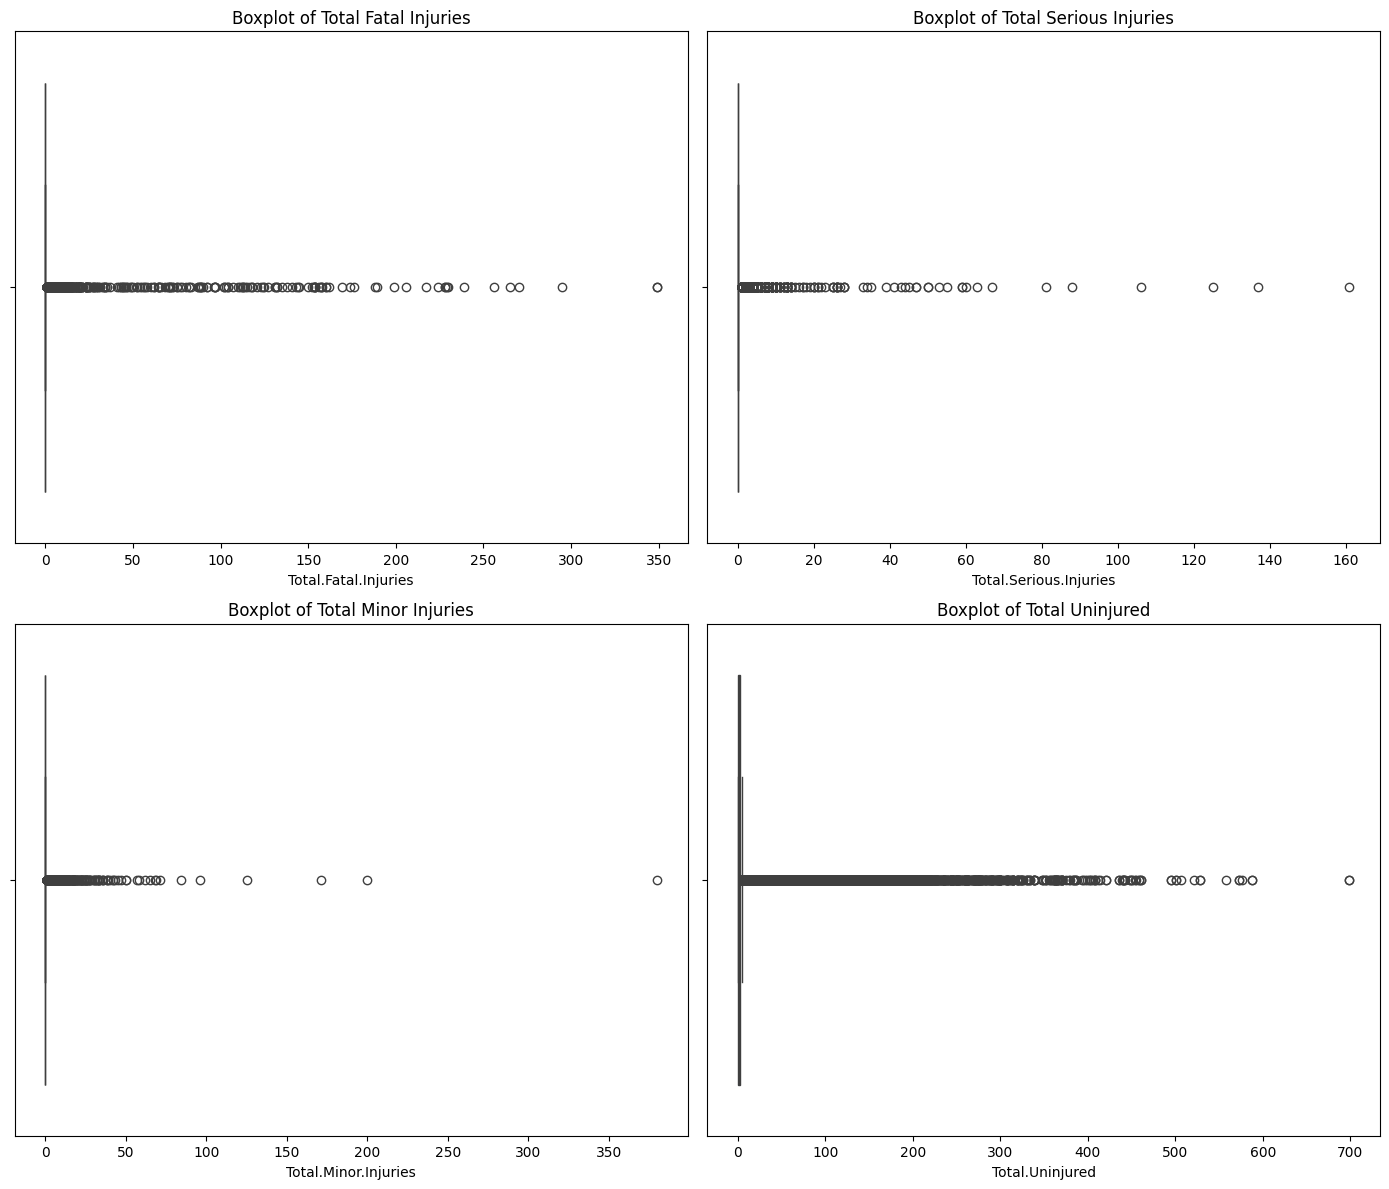

In [ ]:
#Visualizing Outliers Using Boxplot.
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# First subplot: Total Fatal Injuries
sns.boxplot(ax=axes[0, 0], x=Aviation_Data['Total.Fatal.Injuries'])
axes[0, 0].set_title('Boxplot of Total Fatal Injuries')

# Second subplot: Total Serious Injuries
sns.boxplot(ax=axes[0, 1], x=Aviation_Data['Total.Serious.Injuries'])
axes[0, 1].set_title('Boxplot of Total Serious Injuries')

# Third subplot: Total Minor Injuries
sns.boxplot(ax=axes[1, 0], x=Aviation_Data['Total.Minor.Injuries'])
axes[1, 0].set_title('Boxplot of Total Minor Injuries')

# Fourth subplot: Total Uninjured
sns.boxplot(ax=axes[1, 1], x=Aviation_Data['Total.Uninjured'])
axes[1, 1].set_title('Boxplot of Total Uninjured')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
#Removing Outliers Based on the identification.
Aviation_Data1 = Aviation_Data.copy()
Aviation_Data1 = Aviation_Data[outliers_all]
Aviation_Data1.reset_index(drop=True, inplace=True)

In [ ]:
#Creating new columns from the event dat column.
Aviation_Data['Event.Year'] = Aviation_Data['Event.Date'].dt.year
Aviation_Data['Event.Month'] = Aviation_Data['Event.Date'].dt.month

In [ ]:
Aviation_Data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Registration.Number,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event.Year,Event.Month
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,No Data,Fatal(2),Destroyed,NC6404,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,2020-09-25,1948,10
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,No Data,Fatal(4),Destroyed,N5069P,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19,1962,7
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,No Data,Fatal(3),Destroyed,N5142R,...,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2007-02-26,1974,8
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,No Data,Fatal(2),Destroyed,N1168J,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-09-12,1977,6
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,No Data,Fatal(1),Destroyed,N15NY,...,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,1980-04-16,1979,8


# **4. Exploratory Data Analysis (EDA) and Visualization:**

In [ ]:
Aviation_Data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Name', 'Injury.Severity',
       'Aircraft.damage', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date',
       'Event.Year', 'Event.Month'],
      dtype='object')

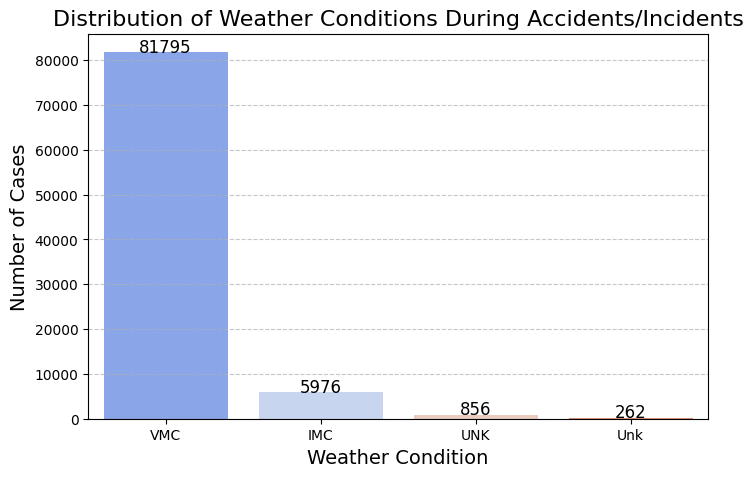

In [ ]:
# Calculating the distribution of weather conditions during accidents and incidents.
weather_distribution = Aviation_Data['Weather.Condition'].value_counts().reset_index()
weather_distribution.columns = ['Weather.Condition', 'Count']

#Plotting the bar plot.
plt.figure(figsize=(8, 5))
sns.barplot(x='Weather.Condition', y='Count', hue='Weather.Condition', data=weather_distribution, palette="coolwarm", legend=False)
plt.title('Distribution of Weather Conditions During Accidents/Incidents', fontsize=16)
plt.xlabel('Weather Condition', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)

# Add labels on top of the bars
for index, value in enumerate(weather_distribution['Count']):
    plt.text(index, value + 0.05, str(value), ha='center', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

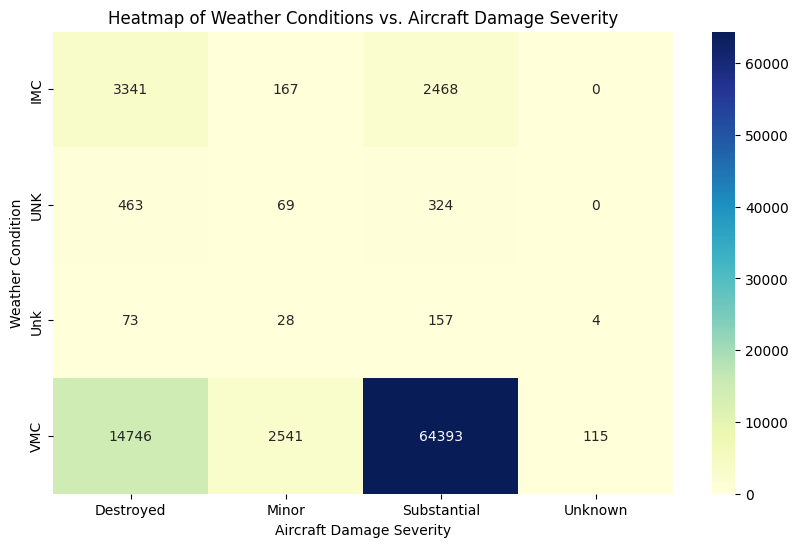

In [ ]:
#Correlation between severe weather conditions and the severity of injuries
#Here there is no numerical data, therefore I have used cat codes to convert categorical data into numerical codes.
Aviation_Data['Damage_Code'] = Aviation_Data['Aircraft.damage'].astype('category').cat.codes
Aviation_Data['Weather_Code'] = Aviation_Data['Weather.Condition'].astype('category').cat.codes
contingency_table = pd.crosstab(Aviation_Data['Weather.Condition'], Aviation_Data['Aircraft.damage'])

#Plotting thr heatmap.
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Weather Conditions vs. Aircraft Damage Severity')
plt.xlabel('Aircraft Damage Severity')
plt.ylabel('Weather Condition')
plt.show()

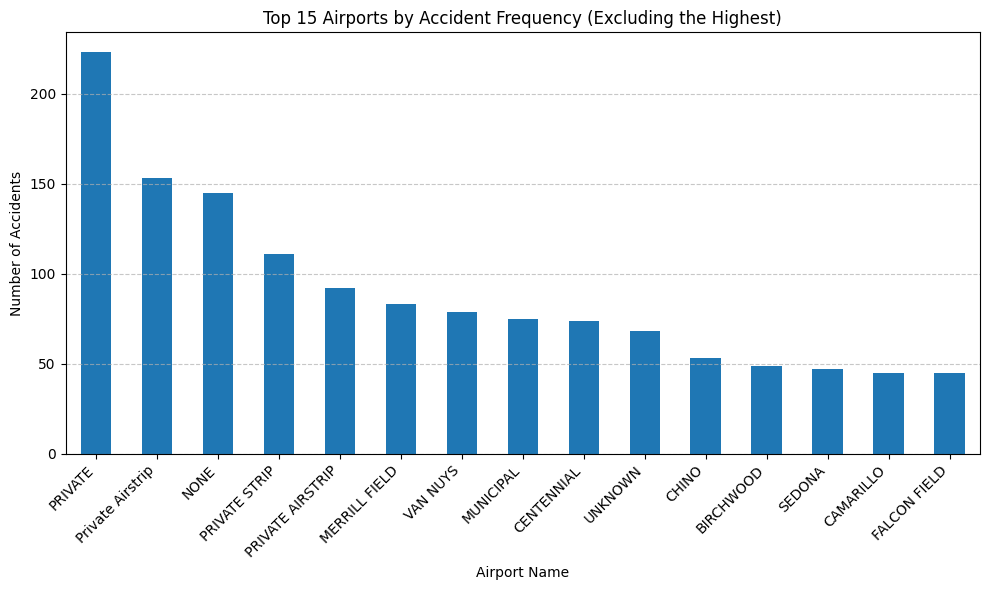

In [ ]:
#Selecting the investigation type as accident and counting the values.
accidents_df = Aviation_Data[Aviation_Data['Investigation.Type'] == 'Accident']
accident_counts = accidents_df['Airport.Name'].value_counts()
sorted_accidents = accident_counts.sort_values(ascending=False)
sorted_accidents = sorted_accidents[2:]

#Getting top 15 accident based on airports.
top_15_accidents = sorted_accidents.head(15)

#Plotting the barplot.
plt.figure(figsize=(10, 6))
top_15_accidents.plot(kind='bar')
plt.title('Top 15 Airports by Accident Frequency (Excluding the Highest)')
plt.xlabel('Airport Name')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#Getting the value counts of investigation typre.
accident_count = Aviation_Data['Investigation.Type'].value_counts()
accident_count

,count
Investigation.Type,
Accident,85015
Incident,3874


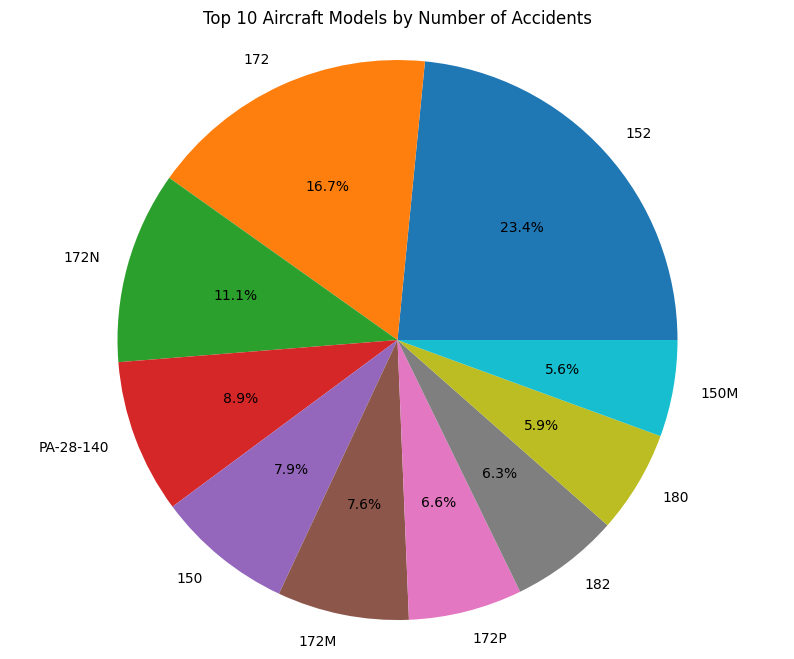

In [ ]:
#Calculating the accident count based on model name.
model_accidents = Aviation_Data.groupby('Model').size().reset_index(name='Accident_Count')
model_accidents = model_accidents.sort_values(by='Accident_Count', ascending=False)

#Getting top 10 aircraft models by names
top_10_models = model_accidents.head(10)

#Plotting the pie chart.
plt.figure(figsize=(10, 8))
plt.pie(top_10_models['Accident_Count'], labels=top_10_models['Model'], autopct='%1.1f%%')
plt.title('Top 10 Aircraft Models by Number of Accidents')
plt.axis('equal')
plt.show()

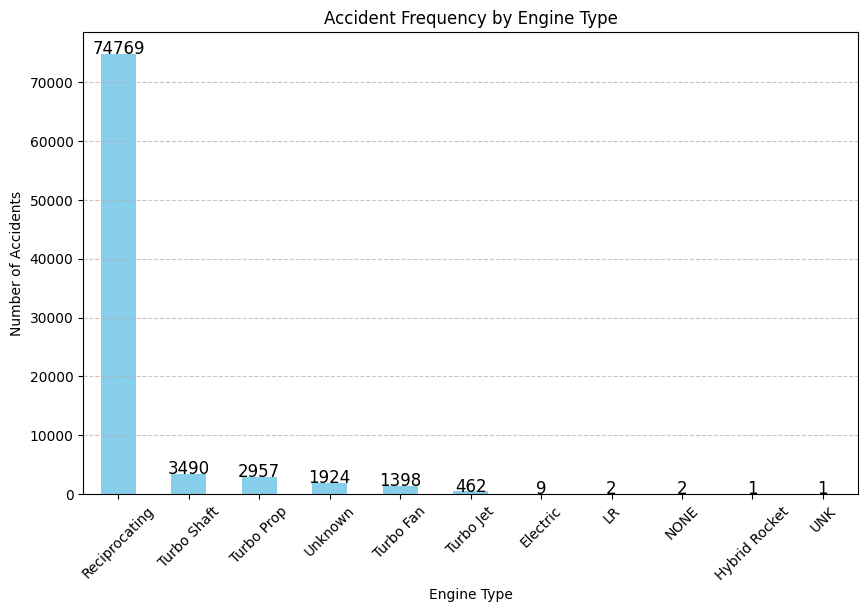

In [ ]:
#Calculating unique number of engines.
engine_counts = Aviation_Data['Engine.Type'].value_counts()

# Filter for accidents only and then count occurrences by engine type.
accident_counts = Aviation_Data[Aviation_Data['Investigation.Type'] == 'Accident']['Engine.Type'].value_counts()

#Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = accident_counts.plot(kind='bar', color='skyblue')
plt.title('Accident Frequency by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on top of the bars
for index, value in enumerate(accident_counts):
    plt.text(index, value + 0.05, str(value), ha='center', fontsize=12)

plt.show()

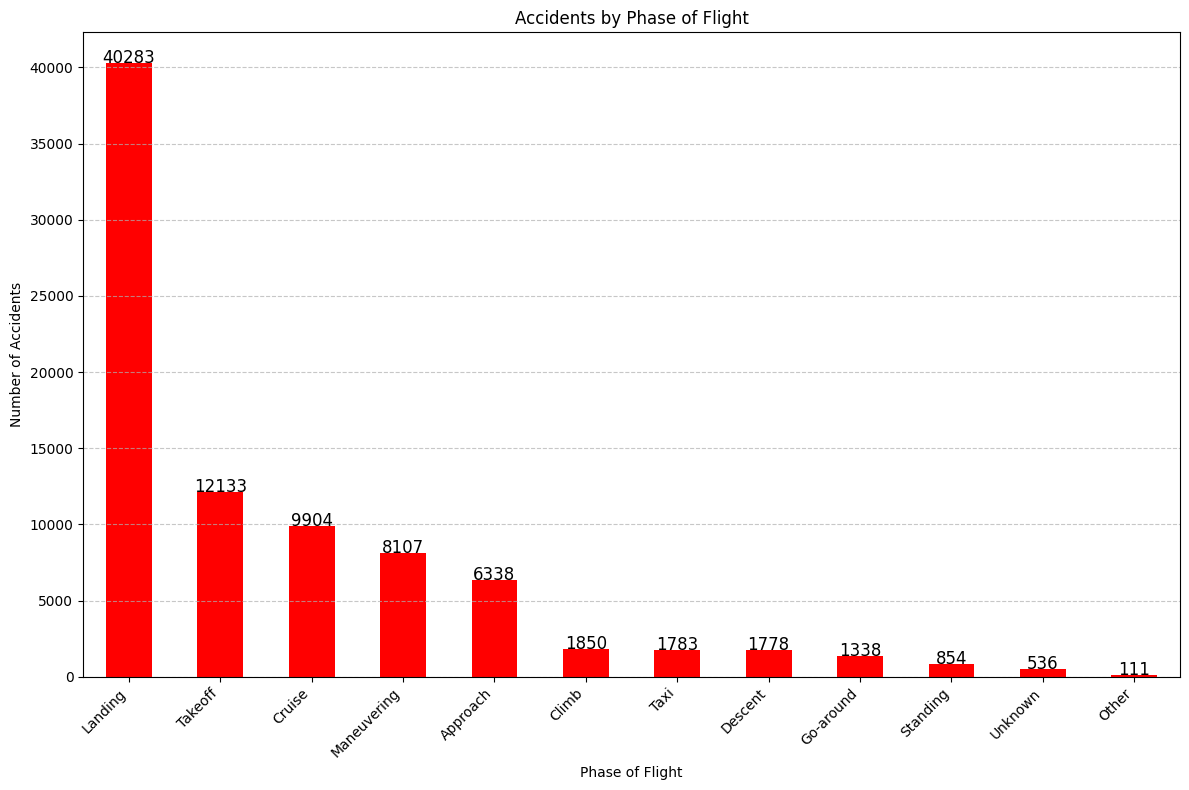

In [ ]:
#Calculating unique phases of flight.
phases_of_flight = Aviation_Data['Broad.phase.of.flight'].value_counts()

# Filter for accidents only and then count occurrences by phase of flight
accident_counts = Aviation_Data[Aviation_Data['Investigation.Type'] == 'Accident']['Broad.phase.of.flight'].value_counts()

# Plot the bar plot
plt.figure(figsize=(12, 8))
accident_counts.plot(kind='bar', color='red')
plt.title('Accidents by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
for index, value in enumerate(accident_counts):
    plt.text(index, value + 0.05, str(value), ha='center', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

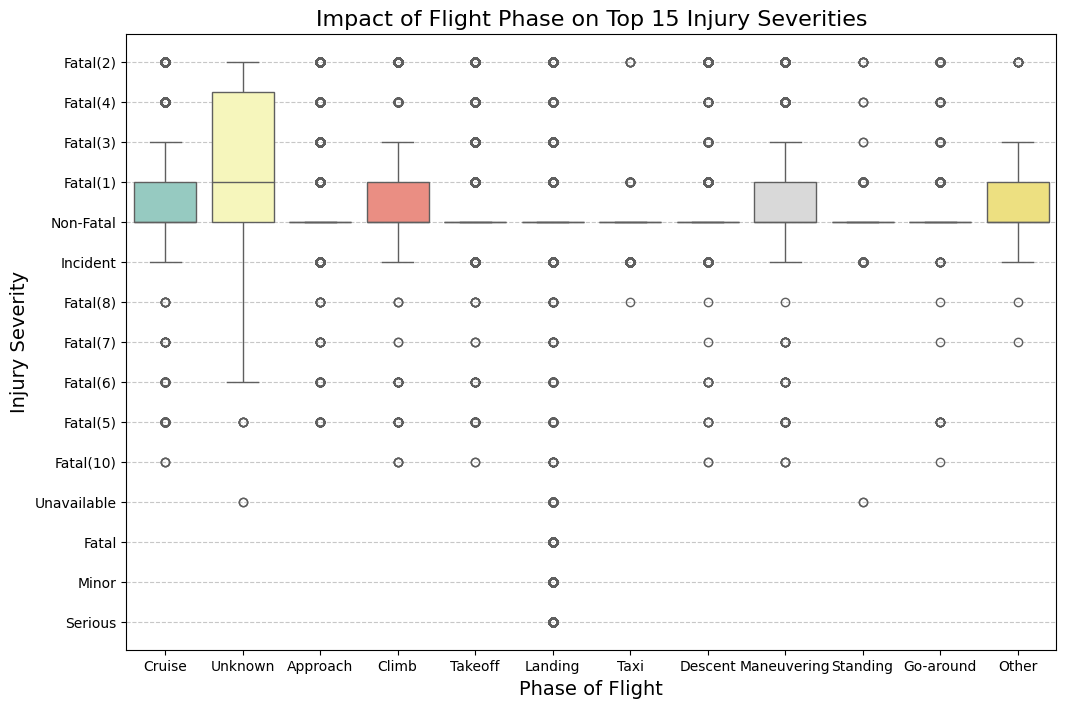

In [ ]:
#Grouping injury severity and calculating count
severity_group = Aviation_Data.groupby('Injury.Severity').size().reset_index(name='Count')

# Sort the resulting DataFrame by the 'Count' column in descending order and get the top 15 severity levels
top_severities = severity_group.sort_values(by='Count', ascending=False).head(15)['Injury.Severity']

# Filter the original data to include only the top 15 injury severity levels
filtered_data = Aviation_Data[Aviation_Data['Injury.Severity'].isin(top_severities)]

# Plotting the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Broad.phase.of.flight', y='Injury.Severity', data=filtered_data,
            palette="Set3", hue='Broad.phase.of.flight', legend=False)

plt.title('Impact of Flight Phase on Top 15 Injury Severities', fontsize=16)
plt.xlabel('Phase of Flight', fontsize=14)
plt.ylabel('Injury Severity', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



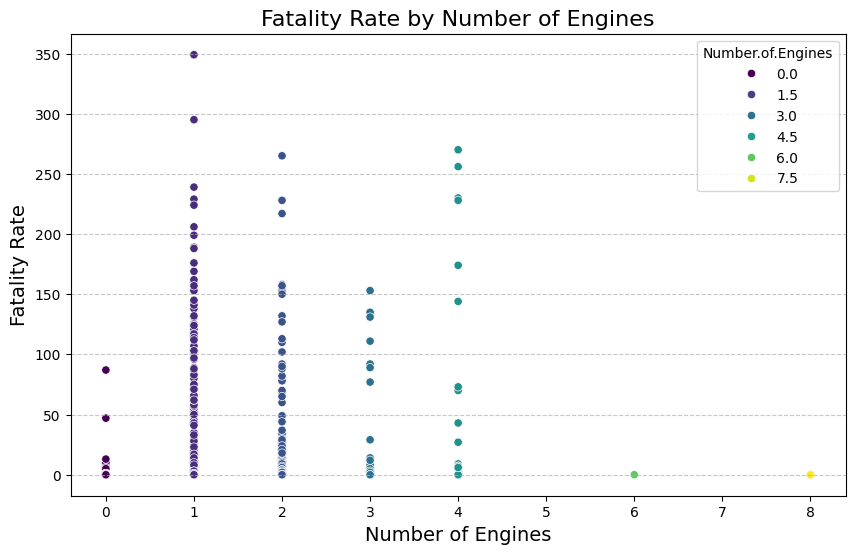

In [ ]:
#Calculating average of fatalities based of make and engines column.
fatality_by_make = Aviation_Data.groupby('Make').agg({'Total.Fatal.Injuries': 'mean'}).reset_index()
fatality_by_engines = Aviation_Data.groupby('Number.of.Engines').agg({'Total.Fatal.Injuries': 'mean'}).reset_index()

#Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number.of.Engines', y='Total.Fatal.Injuries', data=Aviation_Data, hue='Number.of.Engines', palette="viridis")
plt.title('Fatality Rate by Number of Engines', fontsize=16)
plt.xlabel('Number of Engines', fontsize=14)
plt.ylabel('Fatality Rate', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

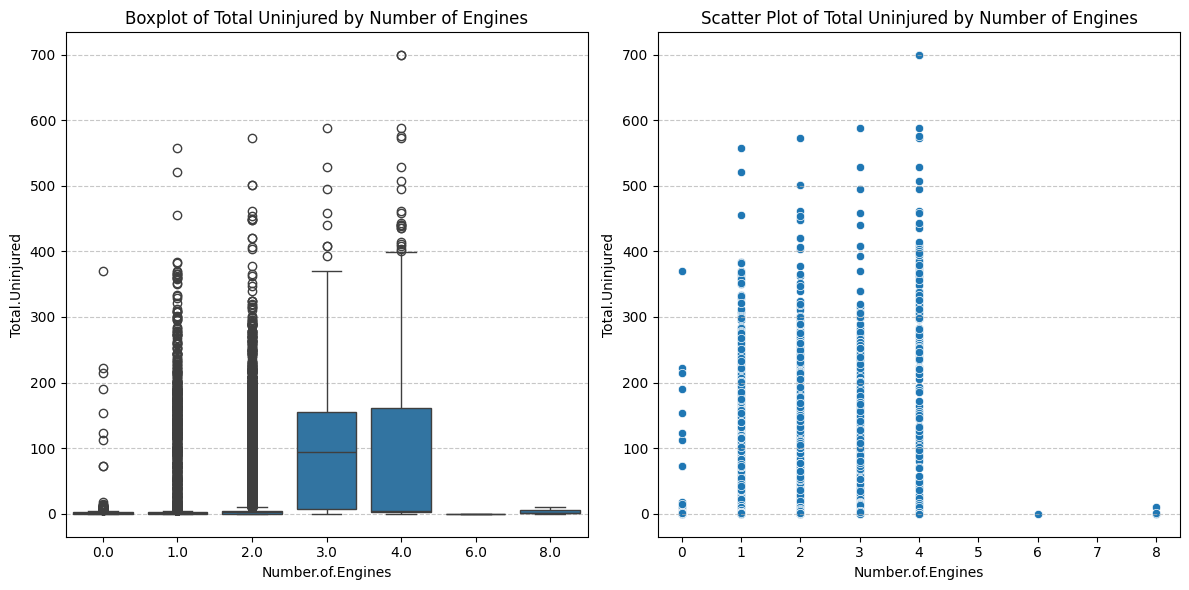

In [ ]:
#Plotting boxplot and scatter plot using subplot.
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Number.of.Engines', y='Total.Uninjured', data=Aviation_Data)
plt.title('Boxplot of Total Uninjured by Number of Engines')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Scatter plot
plt.subplot(1, 2, 2)
sns.scatterplot(x='Number.of.Engines', y='Total.Uninjured', data=Aviation_Data)
plt.title('Scatter Plot of Total Uninjured by Number of Engines')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<ipython-input-35-23770b11b3e3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total.Injuries', y='Location', data=top_20_injuries, palette='viridis')


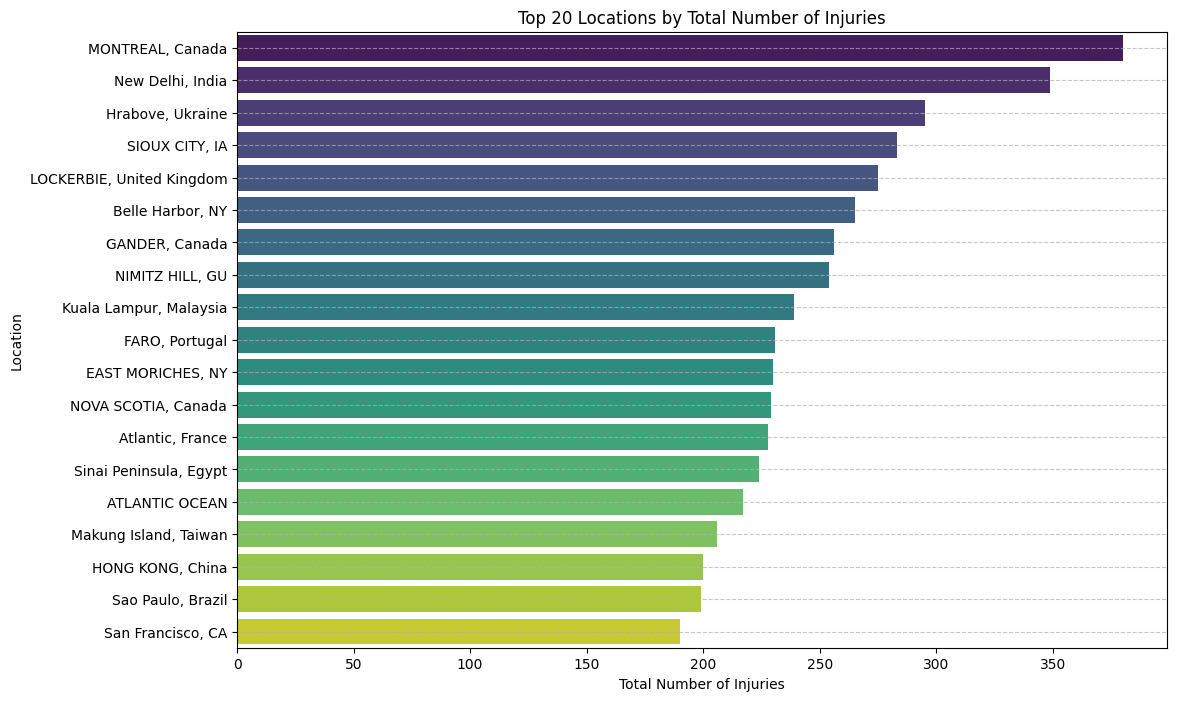

In [ ]:
#Calculating total number of fatal injuries.
Aviation_Data['Total.Injuries'] = Aviation_Data['Total.Fatal.Injuries'] + Aviation_Data['Total.Serious.Injuries'] + Aviation_Data['Total.Minor.Injuries']

# Sort by total injuries and select the top 20 locations
top_20_injuries = Aviation_Data[['Location', 'Total.Injuries']].sort_values(by='Total.Injuries', ascending=False).head(20)

#Plotting bar plot.
plt.figure(figsize=(12, 8))
sns.barplot(x='Total.Injuries', y='Location', data=top_20_injuries, palette='viridis')
plt.xlabel('Total Number of Injuries')
plt.ylabel('Location')
plt.title('Top 20 Locations by Total Number of Injuries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **CONCLUSION**
The analysis shows that most aviation accidents occur under VMC conditions, particularly at private airports and involving the "152" aircraft model. Reciprocating engines are frequently involved in accidents, with the landing phase being the most dangerous. Higher injury rates in Montreal suggest operational issues, while San Francisco demonstrates better safety. These findings highlight the need for targeted safety improvements in specific areas and flight phases.